# Mục tiêu buổi học 

 - Xây dựng cây quyết định với ID3:  
https://nhannguyen95.github.io/bai-tap-phan-lop-cay-quyet-dinh/  
 - Xây dựng mô hình phân lớp Bayes:  
https://machinelearningcoban.com/2017/08/08/nbc/  
 - Xây dựng mô hình phân lớp SVM:  
https://machinelearningcoban.com/2017/04/09/smv/  
 - Xây dựng mô hình phân lớp với giải thuật giảm gradient:  
broken link  

# Phân lớp dùng cây quyết định với giải thuật ID3

## Sử dụng thuật toán ID3 để xây dựng cây quyết định phân loại hoa Iris 

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dữ liệu Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình Decision Tree với thuật toán ID3
clf = DecisionTreeClassifier(criterion='entropy') # Sử dụng entropy để đánh giá độ không chắc chắn (uncertainty)
clf.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình: {:.2f}".format(accuracy))

Độ chính xác của mô hình: 1.00


Giải thích về các tham số có thể có của `clf = DecisionTreeClassifier(criterion='entropy')`:  
 - Tham số criterion='entropy' được sử dụng để chỉ định phương pháp đo lường độ không chắc chắn của một tập dữ liệu, cụ thể là entropy. Entropy được sử dụng trong thuật toán ID3 để đánh giá sự không chắc chắn khi chia dữ liệu.  
 - max_depth: Số lượng tối đa các node được phép từ gốc đến lá trong cây quyết định. Giảm max_depth có thể giảm nguy cơ overfitting.  
 - min_samples_split: Số lượng mẫu tối thiểu cần phải có trong một node để nó được phép được chia. Giảm min_samples_split có thể tạo ra các cây với số lượng node ít hơn.  
 - min_samples_leaf: Số lượng mẫu tối thiểu cần phải có trong một lá. Giảm min_samples_leaf có thể tạo ra các lá có số lượng mẫu ít hơn.  
 - max_features: Số lượng features được lựa chọn để tìm kiếm mỗi lần chia.  
 - splitter: Phương thức được sử dụng để chọn feature để chia node. Mặc định là 'best', nhưng bạn cũng có thể chọn 'random'.  

## Visualize cây quyết định đã xây dựng

### In trực tiếp cấu trúc cây 

In [4]:
from sklearn.tree import export_text

# In ra cấu trúc của cây quyết định
tree_rules = export_text(clf, feature_names=iris.feature_names)
print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.60
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Vẽ cấu trúc cây ra đồ thị 

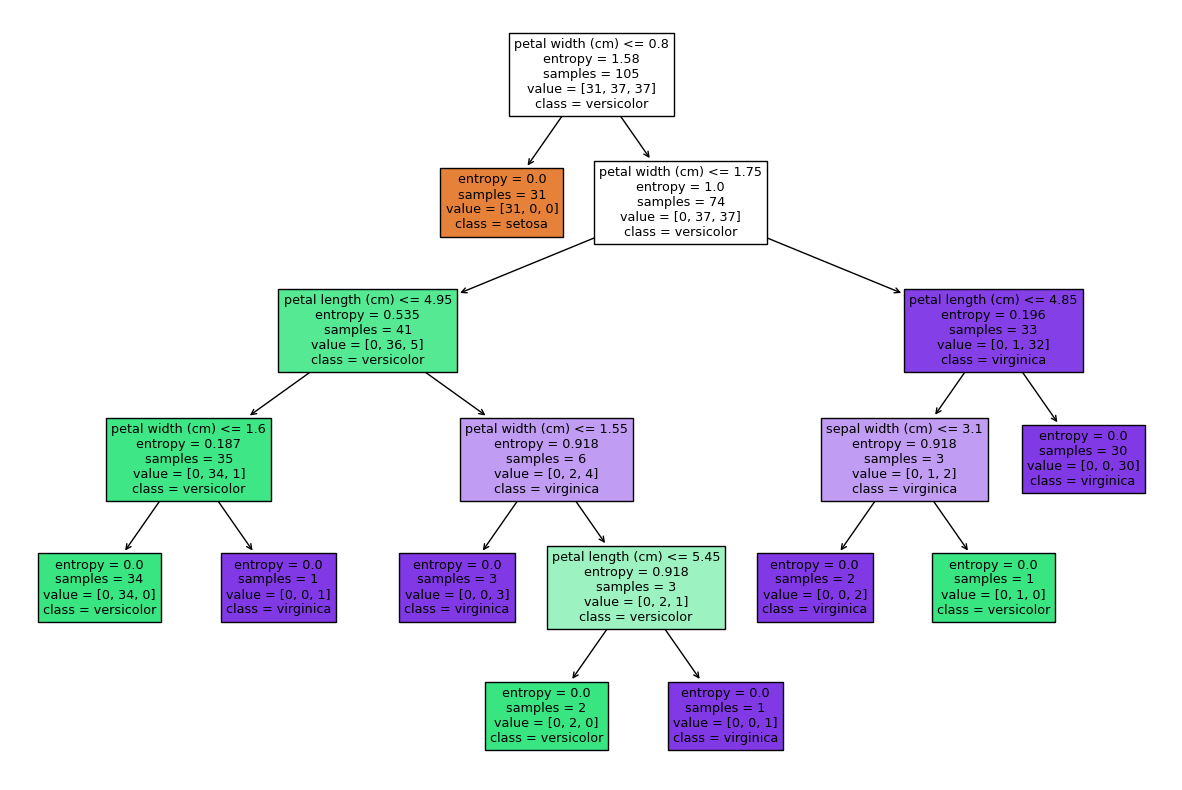

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Phân lớp dùng Naive Bayes

Naive Bayes thường hoạt động tốt cho dữ liệu khi các giả định về sự độc lập giữa các biến độc lập đúng. Đối với dữ liệu thực tế, cần kiểm tra các giả định này trước khi sử dụng thuật toán Naive Bayes.

Trong phân loại Naive Bayes, có ba phân phối chính được sử dụng để mô hình hóa xác suất của các biến đặc trưng:  
 - Phân phối Gaussian (hoặc phân phối chuẩn): Sử dụng cho các biến liên tục.  
 - Phân phối Multinomial: Sử dụng cho các biến rời rạc có thể đếm được. 
 - Phân phối Bernoulli: Sử dụng cho các biến nhị phân hoặc biến rời rạc có giá trị 0 và 1.  
Ngoài ra còn 2 phân phối nữa.  
Cụ thể:  
__all__ = [
    "BernoulliNB",
    "GaussianNB",
    "MultinomialNB",
    "ComplementNB",
    "CategoricalNB",
]

## Sử dụng phân phối Gaussian (phân phối chuẩn)

Dữ liệu là bộ dữ liệu hoa Iris. Input X là dữ liệu liên tục. Số nhãn đầu ra là 3. 

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


## Sử dụng phân phối Multinomial (phân phối đa thức)

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Convert text data to numerical vectors
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train, y_train)

# Make predictions
X_test = vectorizer.transform(["This is a test document"])
y_pred = mnb.predict(X_test)

print("Predicted category:", newsgroups_train.target_names[y_pred[0]])


Predicted category: sci.crypt


## Sử dụng phân phối Bernoulli 

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')

# Convert text data to binary vectors
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(newsgroups_train.data)
y_train = newsgroups_train.target

# Initialize Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the model
bnb.fit(X_train, y_train)

# Make predictions
X_test = vectorizer.transform(["This is a test document"])
y_pred = bnb.predict(X_test)

print("Predicted category:", newsgroups_train.target_names[y_pred[0]])

Predicted category: misc.forsale


# Phân lớp dùng SVM 

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

# Initialize SVM classifier
svm_classifier = SVC(kernel="linear")   # SVC (Support Vector Classifier)

# Train the model
svm_classifier.fit(X_train, y_train)
# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Phân lớp dùng giải thuật giảm gradient

In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Thêm cột bias vào dữ liệu
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Khởi tạo tham số
np.random.seed(42)
theta = np.random.randn(X_train_bias.shape[1])

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for i in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
    return theta

# Huấn luyện mô hình
learning_rate = 0.001
iterations = 2000
theta = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Dự đoán nhãn cho tập kiểm tra
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

predictions = predict(X_test_bias, theta)

# Tính độ chính xác
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7111111111111111
